In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (16, 12)

# Análisis del cesped

Para poder contar la cantidad de cesped que existe en un gardin, de primero es necesario análisar la grama utilizando el filtro laplaciano, este es un kernel de detección de bordes que utiliza el metodo de cruce por cero (la segunda derivada). El kernel laplariano es el siguiente:

In [2]:
lapraciano=np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]])
lapraciano

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

# Kernel lapraciano

Función para evaluar resultados del kernel laplaciano 

In [3]:
def convolutional_filter(imagen, nombre_imagen_a_generar):
    #Carga la imagen
    img = cv2.imread(imagen)
    
    #Eliminar el ruido
    img = cv2.GaussianBlur(img, (3, 3), 0)
    
    #Convierte a escala de grises
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #Aplica filtro lapraciano
    #img = cv2.Laplacian(gray, cv2.CV_16S, ksize=3)
    img = cv2.filter2D(gray, -1, lapraciano)
    
    cv2.imwrite(nombre_imagen_a_generar, img)
    img_edited = cv2.imread(nombre_imagen_a_generar)
    img_edited = cv2.cvtColor(img_edited, cv2.COLOR_BGR2RGB)
    
    return img_edited

# Evaluación

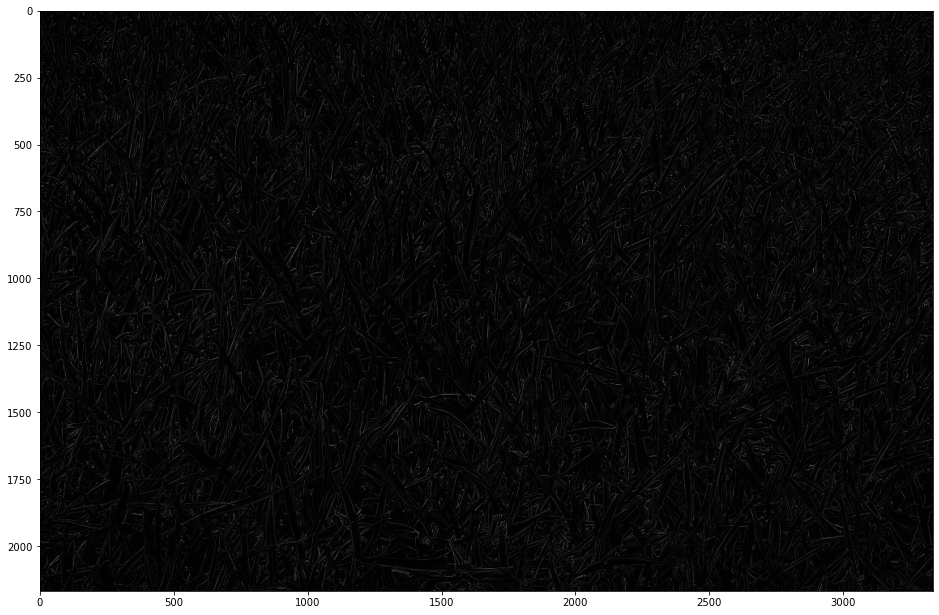

In [4]:
img_lapraciano_1 = convolutional_filter("imagenes-originales/grama-1.jpg", "01-imagenes/grama-1.jpg")

plt.imshow(img_lapraciano_1)
plt.show()

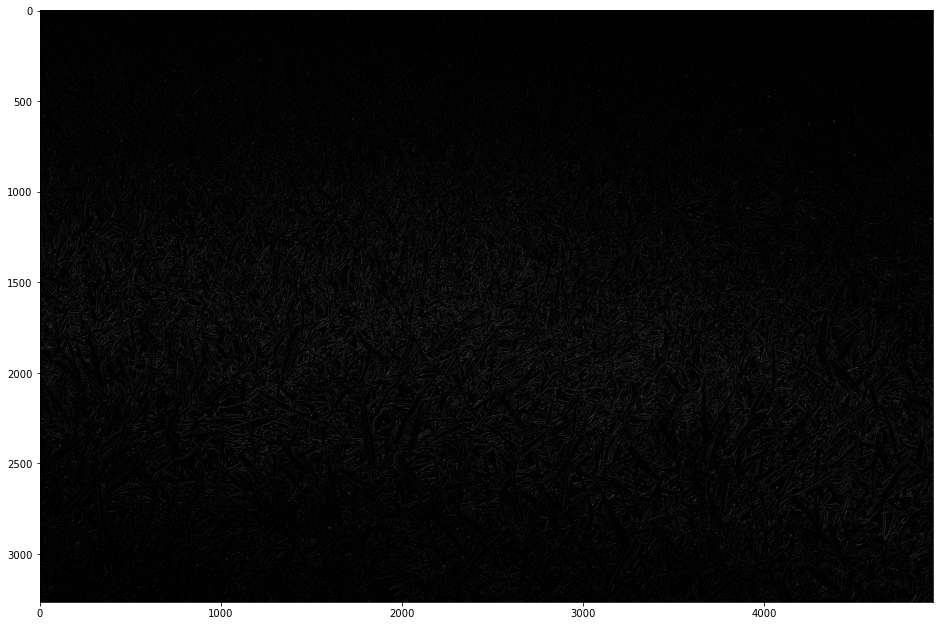

In [5]:
img_lapraciano_2 = convolutional_filter("imagenes-originales/grama-2.jpg", "01-imagenes/grama-2.jpg")

plt.imshow(img_lapraciano_2)
plt.show()

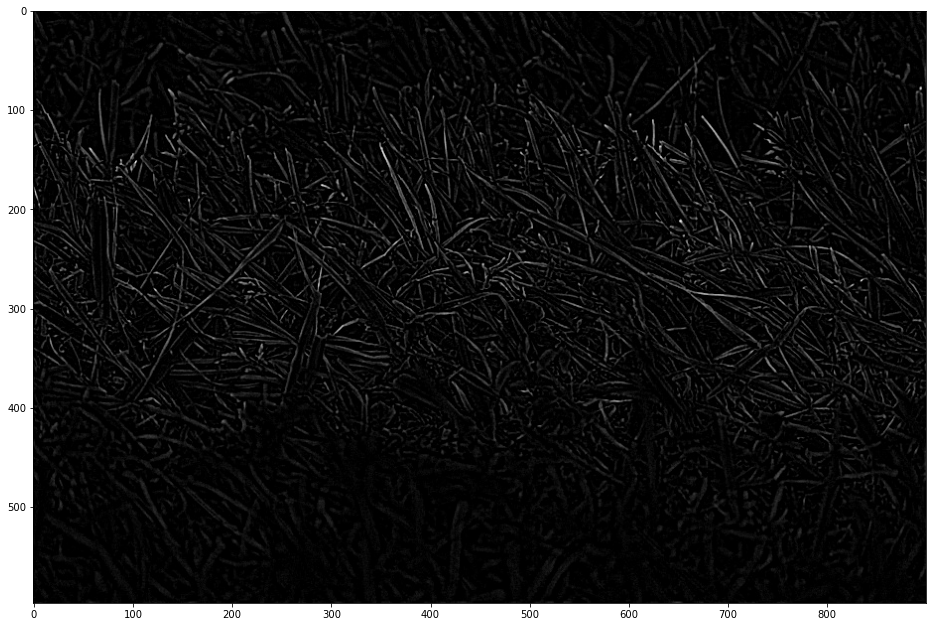

In [6]:
img_lapraciano_3 = convolutional_filter("imagenes-originales/grama-3.jpg", "01-imagenes/grama-3.jpg")

plt.imshow(img_lapraciano_3)
plt.show()

# Conclusión

Depende de la resolución de la imagen y del tipo de grama, es posible identificar que cada hoja tiene un borde, este puede ser en forma de arco, cuadrado (si está podado) o aguja. Con esto se realizará un modelo y se entrenará para que pueda identificar esos segmentos de línea.

<b>Borde semi definido en la imagen 1</b>

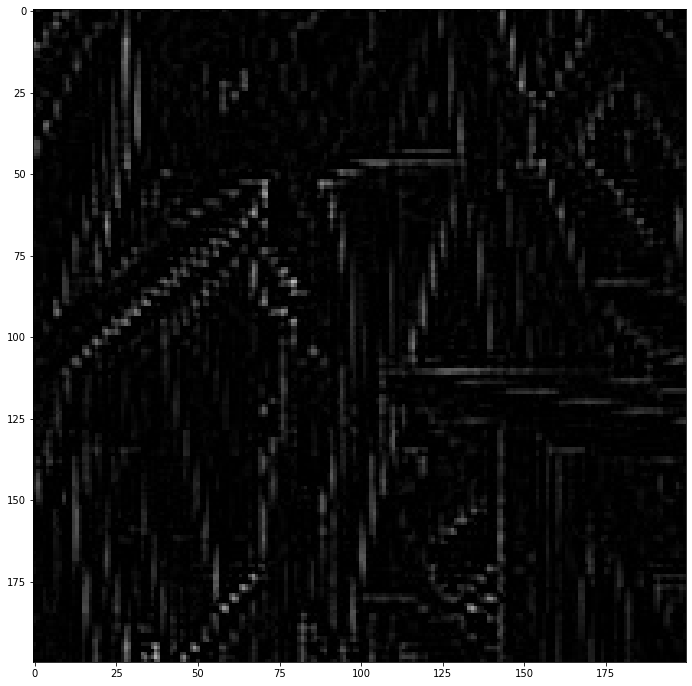

In [7]:
w, h = int(img_lapraciano_1.shape[0]/2), int(img_lapraciano_1.shape[1]/2)
plt.imshow(img_lapraciano_1[w+100:w+300, h+100:h+300, :])
plt.show()

<b>Borde definido en la imagen 2</b>

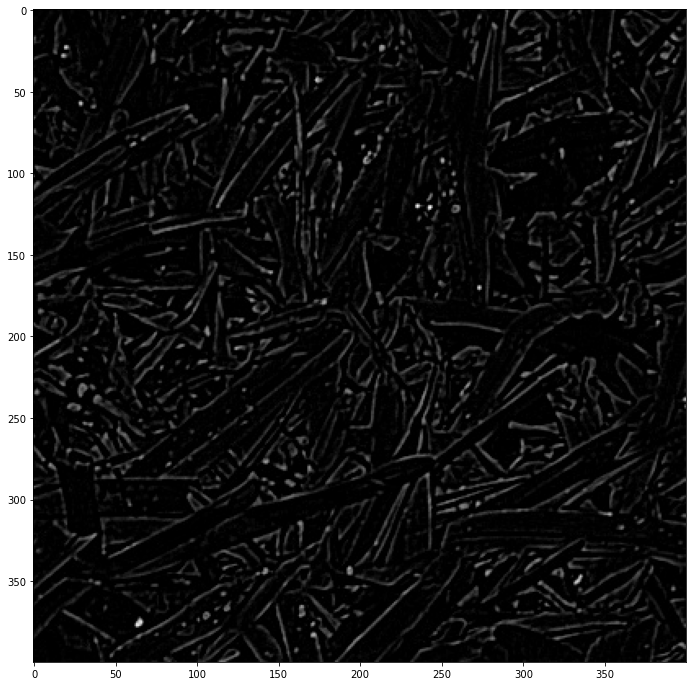

In [8]:
w, h = int(img_lapraciano_2.shape[0]/2), int(img_lapraciano_2.shape[1]/2)
plt.imshow(img_lapraciano_2[w-200:w+200, h-200:h+200, :])
plt.show()

<b>Líneas en la imagen 3</b>

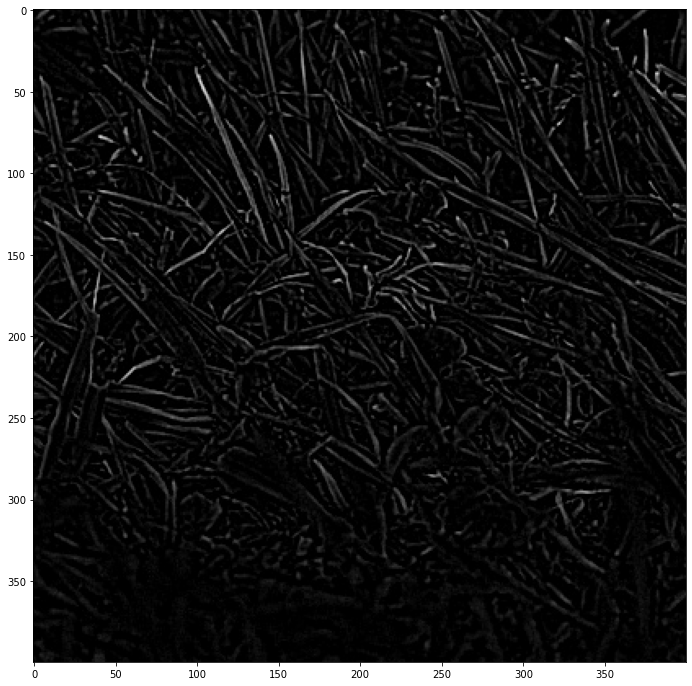

In [9]:
w, h = int(img_lapraciano_3.shape[0]/2), int(img_lapraciano_3.shape[1]/2)
plt.imshow(img_lapraciano_3[w-200:w+200, h-200:h+200, :])
plt.show()

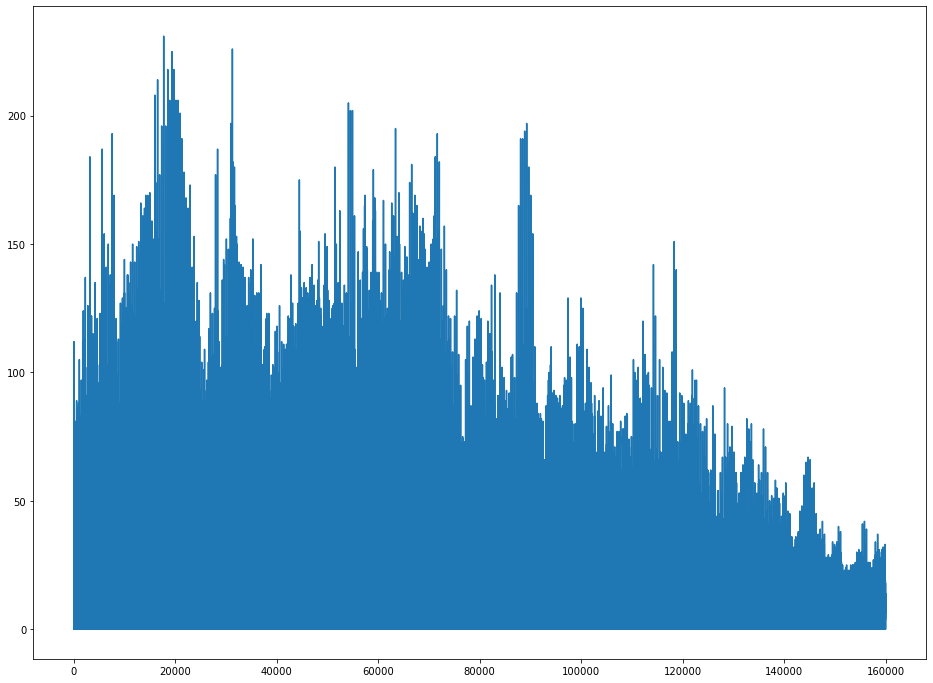

In [13]:
test = img_lapraciano_3[w-200:w+200, h-200:h+200, 0]
ab = test.shape
test = test.reshape(ab[0]*ab[1], 1)
plt.plot(test)
plt.show()

In [23]:
def grafica_3d(img_matriz, angulo_camara):
    #Puntos
    ejez = np.zeros((img_matriz.shape[0],img_matriz.shape[1]))
    for x in range(0, img_matriz.shape[0]):
        for y in range(0, img_matriz.shape[1]):
            ejez[x,y] = 255-img_matriz[x, y]
    ejex,ejey = np.mgrid[0:ejez.shape[0], 0:ejez.shape[1]]

    #Graficando en 3D
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter3D(ejex, ejey, ejez, c=ejez, cmap='gray')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    #Escala
    ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.42, 1, 0.42, 1]))

    ax.view_init(angulo_camara, 500)
    ax.azim = 180

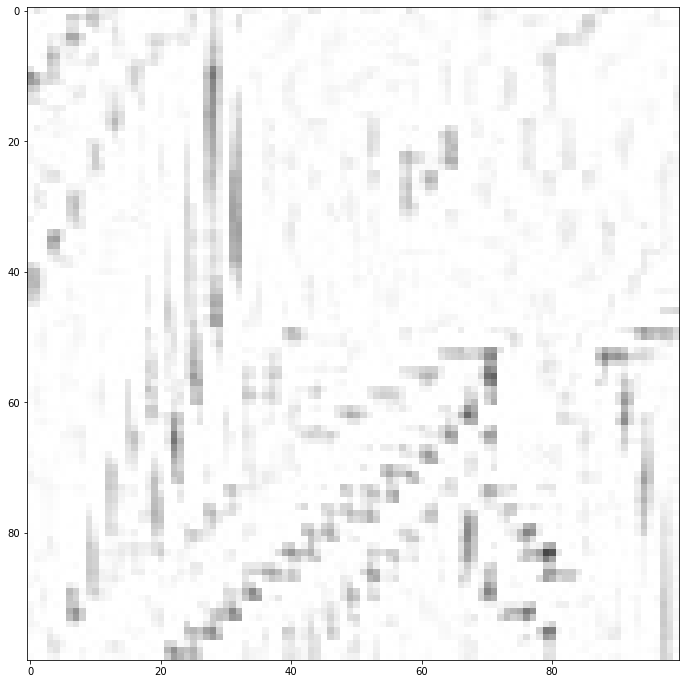

In [37]:
w, h = int(img_lapraciano_1.shape[0]/2), int(img_lapraciano_1.shape[1]/2)
plt.imshow(255-img_lapraciano_1[w+100:w+200, h+100:h+200, :])
plt.show()

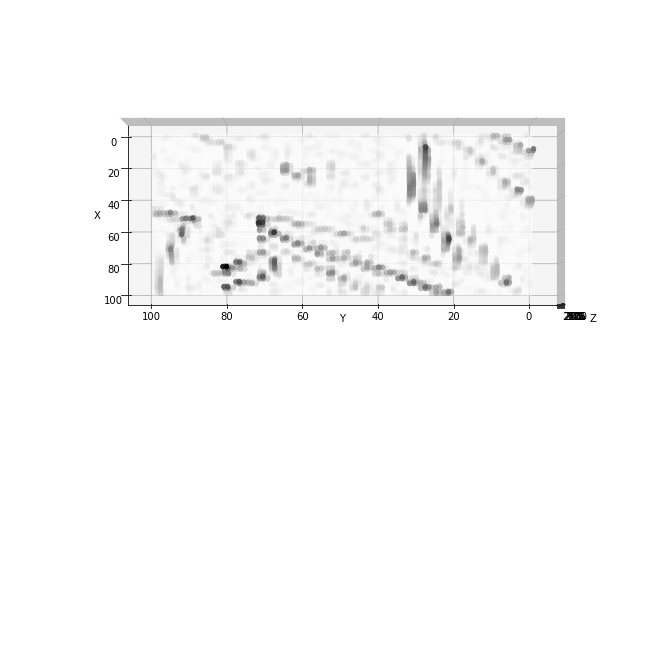

In [39]:
from mpl_toolkits.mplot3d import Axes3D

test = img_lapraciano_1[w+100:w+200, h+100:h+200, 0]
grafica_3d(test, -90)